In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
engine.execute('SELECT date FROM Measurement').fetchall()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
# dates = session.query(Measurement.date).all()
# last_date_list = max(dates)
# last_date = dt.datetime(2017, 8, 23)
# one_year_ago = dt.datetime(2016, 8, 23)

# oneyearago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
# sel = [Measurement.date, func.sum(Measurement.prcp)]

# last_year_prcp = session.query(*sel).\
#     filter(Measurement.date >= '2016-08-23').\
#     group_by(Measurement.date).\
#     order_by(Measurement.date).all()
# last_year_prcp

last_year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').all()
last_year_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_year_prcp, columns=['date', 'prcp'])


# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')
prcp_df.set_index(prcp_df['date'], inplace = True)

# prcp_df['prcp'] = prcp_df['prcp'].astype(float)

In [13]:
prcp_df

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
2016-08-23,2016-08-23,0.02
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15


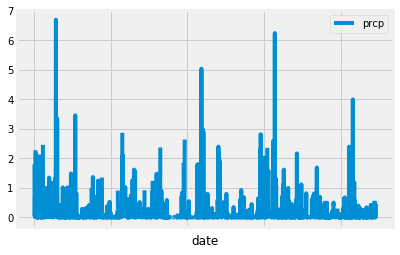

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind='line', x_compat=True)

![precipitation](Images/precipitation.png)

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [16]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct(Measurement.station).count()

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. 
active_stations = session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
most_act_station = active_stations[0][0]
most_act_station

'USC00519281'

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station==most_act_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
temp_obv = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
temp_obv = temp_obv[0][0]
temp_obv

'USC00519281'

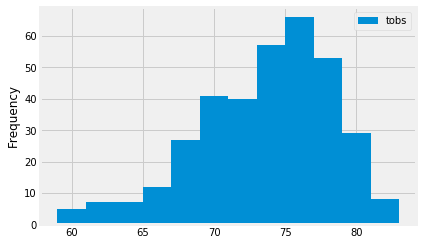

In [22]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == temp_obv).all()
last_year_tobs

tobs_df = pd.DataFrame(last_year_tobs, columns=['date', 'tobs'])


# Sort the dataframe by date
# tobs_df = tobs_df.sort_values('date')
# tobs_df.set_index(tobs_df['date'], inplace = True)

tobs_df.plot.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_trip = calc_temps('2017-08-01', '2017-08-10')
my_trip

[(71.0, 79.02564102564102, 83.0)]

In [25]:
my_trip_df = pd.DataFrame(my_trip, columns=['TMIN', 'TAVE', 'TMAX'])
my_trip_df

,TMIN,TAVE,TMAX
0,71.0,79.025641,83.0


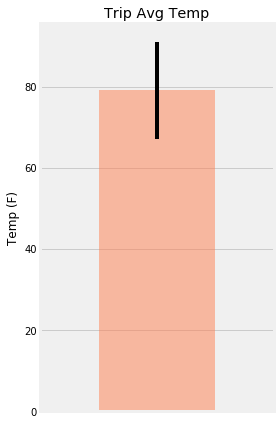

In [26]:
# Plot the results from your previous query as a bar chart. 
my_trip_df.plot.bar(y='TAVE', yerr=(my_trip_df['TMAX'] - my_trip_df['TMIN']), title='Trip Avg Temp', color='coral', alpha=.5, figsize=(4,6))
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.ylabel("Temp (F)")
plt.xticks(np.arange(1, 1.0))
plt.gca().legend_.remove()
plt.tight_layout()
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.prcp]
    
    return session.query(*sel).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(Measurement.prcp.desc()).all()


# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

print(calc_temps('2017-08-01', '2017-08-10'))

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, None)]


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("02-02")

[(59.0, 68.85964912280701, 77.0)]

In [29]:
normals=[]
# Set the start and end date of the trip
start = dt.datetime(2017, 8, 1)
end = dt.datetime(2017, 8, 10)
# Use the start and end date to create a range of dates
trip = session.query(Measurement.date).\
filter(Measurement.date >= start).\
filter(Measurement.date <= end).\
group_by(Measurement.date).all()
trip

[('2017-08-02'),
 ('2017-08-03'),
 ('2017-08-04'),
 ('2017-08-05'),
 ('2017-08-06'),
 ('2017-08-07'),
 ('2017-08-08'),
 ('2017-08-09'),
 ('2017-08-10')]

In [45]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals=[]
# Set the start and end date of the trip
start = dt.datetime(2017, 8, 1)
end = dt.datetime(2017, 8, 10)
# Use the start and end date to create a range of dates
trip = session.query(Measurement.date).\
filter(Measurement.date >= start).\
filter(Measurement.date <= end).\
group_by(Measurement.date).all()

trip = list(np.ravel(trip))
trip
# Stip off the year and save a list of %m-%d strings

# print([(date.strip('8'),) for date in trip])
# trip_md= [s.replace('2017-', '') for s in trip]
trip_md=[]
for date in trip:
#     print(date)
    month_day = date[5:]
    trip_md.append(month_day)
    
trip_md = list(np.ravel(trip_md))
       
# Loop through the list of %m-%d strings and calculate the normals for each date
for date in trip_md:
    day = daily_normals(date)
    normals.append(day)
    
normals = [i[0] for i in normals]
normals

[(68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0),
 (68.0, 76.5576923076923, 83.0),
 (69.0, 75.98039215686275, 81.0),
 (65.0, 76.42, 83.0)]

In [46]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_norm_df = pd.DataFrame(normals, columns=['TMIN', 'TAVE', 'TMAX'])
daily_norm_df['date'] = trip
daily_norm_df.set_index('date', inplace=True)
daily_norm_df

,TMIN,TAVE,TMAX
date,,,
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0
2017-08-08,68.0,76.557692,83.0
2017-08-09,69.0,75.980392,81.0
2017-08-10,65.0,76.420000,83.0


([<matplotlib.axis.XTick at 0x122066438>,
 <a list of 9 Text xticklabel objects>)

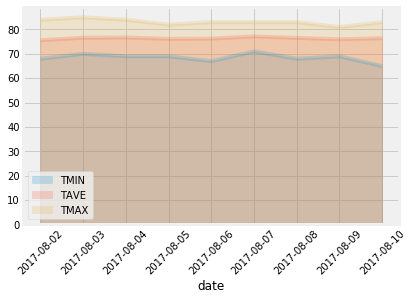

In [48]:
# Plot the daily normals as an area plot with `stacked=False`
xticks = daily_norm_df.index
daily_norm_df.plot(kind='area', stacked=False, alpha=.2, use_index=True)
plt.xticks(np.arange(len(daily_norm_df)), xticks, rotation='45')